# Import Libraries

In [7]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

# Load Data & Data pre-processing

### Load Data

In [8]:
train_df = pd.read_csv("loan_train.csv")
test_df = pd.read_csv("loan_test.csv")

### Data visualization and preprocessing

check with the train data:

In [10]:
train_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


check with the test data:

In [11]:
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


Check the target variable's label distribution:

In [12]:
train_df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

用 Histogram 打印出分布情况

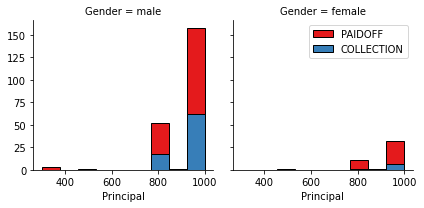

In [14]:
import seaborn as sns
bins = np.linspace(train_df.Principal.min(), train_df.Principal.max(), 10)
g = sns.FacetGrid(train_df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

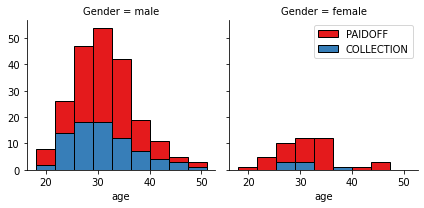

In [17]:
bins = np.linspace(train_df.age.min(), train_df.age.max(), 10)
g = sns.FacetGrid(train_df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

#### Convert to date time object

In [18]:
train_df['due_date'] = pd.to_datetime(train_df['due_date'])
train_df['effective_date'] = pd.to_datetime(train_df['effective_date'])
train_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


### Pre-processing: Feature selection/extraction

<font color='blue'> Set the therehold as 4 </font>

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


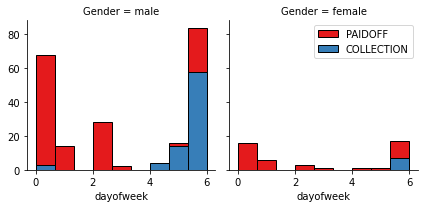

In [24]:
train_df['dayofweek'] = train_df['effective_date'].dt.dayofweek
bins = np.linspace(train_df.dayofweek.min(), train_df.dayofweek.max(), 10)
g = sns.FacetGrid(train_df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
train_df['weekend'] = train_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
train_df.head()

<font color='blue'>Convert Categorical features to numerical values </font>

In [30]:
### Check the gender paid off posibility
# value_counts中的normalize参数支持将数字转换为百分比
train_df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

<font color='blue'>Convert male to 0 and female to 1 for 'Gender' column:</font>

In [32]:
train_df['Gender'].replace(to_replace=['male','female'], value=[0,1], inplace=True) 
train_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


<font color='blue'>One Hot Encoding</font>

In [34]:
### Check the 'education' column
train_df.groupby(['education'])['loan_status'].value_counts(normalize=True) 

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [35]:
### Bulid feature 
Feature = train_df[['Principal','terms','age','Gender','weekend']]
# Add education into featrue(with one hot encoding)
Feature = pd.concat([Feature,pd.get_dummies(train_df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1, inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [38]:
### Built Y
y = train_df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

<font color='blue'>Normalize Data</font>

In [41]:
### Data Standardization(technically should be done after train test split )
X = Feature
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification

There are 4 models need to be tranined: 
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression

### K Nearest Neighbor(KNN)

In [44]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [45]:
# Training
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 12
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMtx=[];
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.67142857, 0.65714286, 0.77142857, 0.7       , 0.75714286,
       0.77142857, 0.74285714, 0.72857143, 0.74285714, 0.71428571,
       0.74285714])

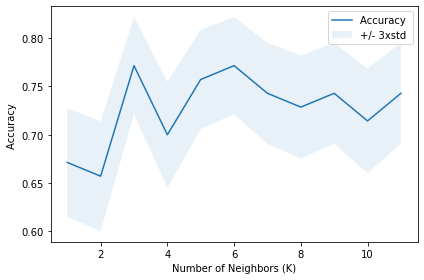

The best accuracy was with 0.7714285714285715 with k= 3


In [46]:
plt.plot(range(1,Ks),mean_acc)
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

neigh = KNeighborsClassifier(n_neighbors=mean_acc.argmax()+1).fit(X_train, y_train)

In [47]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.7714285714285715 with k= 3


In [48]:
# Set value of k as 3
k = 3
# Train the KNN model
loanknn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
loanknn

KNeighborsClassifier(n_neighbors=3)

In [49]:
# Predict the test X_test
yhat = loanknn.predict(X_test)
yhat[0:5]

array(['PAIDOFF', 'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF'],
      dtype=object)

In [50]:
# print the score
print("Train set Accuracy: ", metrics.accuracy_score(y_train, loanknn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8260869565217391
Test set Accuracy:  0.7714285714285715


In [51]:
# F1 Score
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.7782857142857144

In [74]:
# Jaccard Score
from sklearn.metrics import jaccard_score
### You need to mention ‘pos_label’ value to the category which you want to predict as 1.
jaccard_score(y_test, yhat, pos_label='PAIDOFF')

0.7241379310344828

### Decision Tree

In [76]:
# Import library
from sklearn.tree import DecisionTreeClassifier

In [77]:
md = 10
mean_acc = np.zeros((md-1))
std_acc = np.zeros((md-1))
ConfustionMx = [];
for n in range(1,md):
    
    #Train Model and Predict  
    loant = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train,y_train)
    yhat=loant.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
### the mean accuracy for different depth
mean_acc

array([0.74285714, 0.74285714, 0.74285714, 0.74285714, 0.72857143,
       0.72857143, 0.72857143, 0.71428571, 0.72857143])

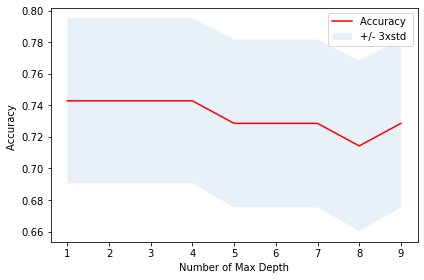

In [78]:
plt.plot(range(1,md),mean_acc,'r')
plt.fill_between(range(1,md),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Max Depth')
plt.tight_layout()
plt.show()

In [80]:
#Building the decision tree with max depth of 4
loandt = DecisionTreeClassifier(criterion='entropy', max_depth=4)

#Check the default parameters
loandt

#Train the Decision tree model
loandt.fit(X_train,y_train)

#Predict using the model
yhat = loandt.predict(X_test)

In [84]:
# Calculating the train and test accuracy
from sklearn.metrics import classification_report
print("Train set Accuracy: ", metrics.accuracy_score(y_train, loandt.predict(X_train)))

print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

# Building the confusion matrix
print (classification_report(y_test, yhat))

Train set Accuracy:  0.7536231884057971
Test set Accuracy:  0.7428571428571429
              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        18
     PAIDOFF       0.74      1.00      0.85        52

    accuracy                           0.74        70
   macro avg       0.37      0.50      0.43        70
weighted avg       0.55      0.74      0.63        70



/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Support Vector Machine

In [87]:
# Import the library for SVM Classifier
from sklearn import svm

# Build a SVM Classifier with a Radial base Function Kernel
loansvm1 = svm.SVC(kernel='rbf').fit(X_train, y_train)
yhat1 = loansvm1.predict(X_test)
svm_r = metrics.accuracy_score(y_test, yhat1)

# Build a SVM Classifier with a Linear Kernel
loansvm2 = svm.SVC(kernel='linear').fit(X_train, y_train)
yhat2 = loansvm2.predict(X_test)
svm_l = metrics.accuracy_score(y_test, yhat2)

# Build a SVM Classifier with a Polynomial Kernel
loansvm3 = svm.SVC(kernel='poly').fit(X_train, y_train)
yhat3 = loansvm3.predict(X_test)
svm_p = metrics.accuracy_score(y_test, yhat3)

# Build a SVM Classifier with a Sigmoid Kernel
loansvm4 = svm.SVC(kernel='sigmoid').fit(X_train, y_train)
yhat4 = loansvm4.predict(X_test)
svm_s = metrics.accuracy_score(y_test, yhat4)

print("Accuracy for Radial Base Function: ", svm_r)
print("Accuracy for Linear Function: ", svm_l)
print("Accuracy for Polynomial Function: ", svm_p)
print("Accuracy for Sigmoid Function: ", svm_s)


Accuracy for Radial Base Function:  0.7428571428571429
Accuracy for Linear Function:  0.7428571428571429
Accuracy for Polynomial Function:  0.7428571428571429
Accuracy for Sigmoid Function:  0.7285714285714285


In [88]:
# Build the SVM CLassifier with RBF
loansvm = svm.SVC(kernel='rbf').fit(X_train, y_train)


In [89]:
# Predicting the test values using the SVM model
yhat = loansvm.predict(X_test)
yhat [0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [90]:
### Print the accuracy
print("Train set Accuracy: ", metrics.accuracy_score(y_train, loansvm.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

print (classification_report(y_test, yhat))

Train set Accuracy:  0.7608695652173914
Test set Accuracy:  0.7428571428571429
              precision    recall  f1-score   support

  COLLECTION       0.50      0.06      0.10        18
     PAIDOFF       0.75      0.98      0.85        52

    accuracy                           0.74        70
   macro avg       0.62      0.52      0.47        70
weighted avg       0.69      0.74      0.66        70



In [91]:
### F1 Score
f1_score(y_test, yhat, average='weighted')

0.657142857142857

In [92]:
### Jaccard index
jaccard_score(y_test, yhat, pos_label='PAIDOFF')

0.7391304347826086

### Logistic Regression

In [93]:
# Import the library
from sklearn.linear_model import LogisticRegression

In [94]:
# Build and train the logestic regression model
loanlr1 = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat1 = loanlr1.predict(X_test)
loanlr_a1 = metrics.accuracy_score(y_test, yhat1)

# Build and train the logestic regression model
loanlr2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat2 = loanlr2.predict(X_test)
loanlr_a2 = metrics.accuracy_score(y_test, yhat2)

# Build and train the logestic regression model
loanlr3 = LogisticRegression(C=0.01, solver='saga').fit(X_train,y_train)
yhat3 = loanlr3.predict(X_test)
loanlr_a3 = metrics.accuracy_score(y_test, yhat3)

# Build and train the logestic regression model
loanlr4 = LogisticRegression(C=0.01, solver='newton-cg').fit(X_train,y_train)
yhat4 = loanlr4.predict(X_test)
loanlr_a4 = metrics.accuracy_score(y_test, yhat4)

# Build and train the logestic regression model
loanlr5 = LogisticRegression(C=0.01, solver='lbfgs').fit(X_train,y_train)
yhat5 = loanlr5.predict(X_test)
loanlr_a5 = metrics.accuracy_score(y_test, yhat5)


print('LR model with liblinear solver',loanlr_a1)
print('LR model with sag solver',loanlr_a2)
print('LR model with saga solver',loanlr_a3)
print('LR model with newton-cg solver',loanlr_a4)
print('LR model with lbfgs solver',loanlr_a5)

LR model with liblinear solver 0.7571428571428571
LR model with sag solver 0.7428571428571429
LR model with saga solver 0.7428571428571429
LR model with newton-cg solver 0.7428571428571429
LR model with lbfgs solver 0.7428571428571429


In [95]:
# Find if labels are missing in the models 
print("The label missing in the LR model with liblinear solver",set(y_test) - set(yhat1))
print("The label missing in the LR model with sag solver",set(y_test) - set(yhat2))
print("The label missing in the LR model with saga solver",set(y_test) - set(yhat3))
print("The label missing in the LR model with newton-cg solver",set(y_test) - set(yhat4))
print("The label missing in the LR model with lbfgs solver",set(y_test) - set(yhat5))

The label missing in the LR model with liblinear solver set()
The label missing in the LR model with sag solver {'COLLECTION'}
The label missing in the LR model with saga solver {'COLLECTION'}
The label missing in the LR model with newton-cg solver {'COLLECTION'}
The label missing in the LR model with lbfgs solver {'COLLECTION'}


In [96]:
# Except for the liblinear solver all other model has skipped the label "COLLECTION"
loanlr = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
yhat = loanlr.predict(X_test)

{'COLLECTION', 'PAIDOFF'}

In [105]:
### Print Training Accuracy
print("Train set Accuracy: ", metrics.accuracy_score(y_train, loanlr.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
print(classification_report(y_test, yhat))

Train set Accuracy:  0.7608695652173914
Test set Accuracy:  0.7571428571428571
              precision    recall  f1-score   support

  COLLECTION       1.00      0.06      0.11        18
     PAIDOFF       0.75      1.00      0.86        52

    accuracy                           0.76        70
   macro avg       0.88      0.53      0.48        70
weighted avg       0.82      0.76      0.67        70



In [106]:
# Calculate the f1 score
f1_score(y_test, yhat, average='weighted')

0.6655564531162617

In [107]:
# Jaccard index
jaccard_score(y_test, yhat, pos_label='PAIDOFF')

0.7536231884057971

# Model Evaluation using Test set

There are 3 evalution metrcis:
- Jaccard index
- F1-score
- LogLoass

#### Chech with the test set

In [108]:
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [110]:
test_df['loan_status'].value_counts()

PAIDOFF       40
COLLECTION    14
Name: loan_status, dtype: int64

In [111]:
### Dataset Preprocessing
df = test_df

df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

df.groupby(['education'])['loan_status'].value_counts(normalize=True)

Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)

X_test = Feature

y_test = df['loan_status'].values

X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

### Get the predicted test data with models

In [112]:
### KNN
yhat_knn = loanknn.predict(X_test)
### DT
yhat_dt = loandt.predict(X_test)
### SVM
yhat_svm = loansvm.predict(X_test)
### LR
yhat_lr = loansvm.predict(X_test)

### Jaccard Index

In [114]:
### KNN 
jsc_knn = jaccard_score(y_test, yhat_knn, pos_label="PAIDOFF")
### dt
jsc_dt = jaccard_score(y_test, yhat_dt, pos_label="PAIDOFF")
### svm
jsc_svm = jaccard_score(y_test, yhat_svm, pos_label="PAIDOFF")
### lr
jsc_lr = jaccard_score(y_test, yhat_lr, pos_label="PAIDOFF")

print('KNN Jaccard index: ', jsc_knn)
print('DT Jaccard index: ', jsc_dt)
print('SVM Jaccard index: ', jsc_svm)
print('LR Jaccard index: ', jsc_lr)

KNN Jaccard index:  0.6274509803921569
DT Jaccard index:  0.7407407407407407
SVM Jaccard index:  0.7407407407407407
LR Jaccard index:  0.7407407407407407


### F1-Score

In [117]:
### KNN
f1_knn = f1_score(y_test, yhat_knn, average='weighted')
### DT
f1_dt = f1_score(y_test, yhat_dt, average='weighted')
### SVM
f1_svm = f1_score(y_test, yhat_svm, average='weighted')
### LR
f1_lr = f1_score(y_test, yhat_lr, average='weighted')

print('KNN F1-Score: ', f1_knn)
print('DT F1-Score: ', f1_dt)
print('SVM F1-Score: ', f1_svm)
print('LR F1-Score: ', f1_lr)

KNN F1-Score:  0.6333958054439982
DT F1-Score:  0.6304176516942475
SVM F1-Score:  0.6304176516942475
LR F1-Score:  0.6304176516942475


### LogLoass

In [119]:
from sklearn.metrics import log_loss
# Calculate Log loss -> Logistic Regression
yhat_lr_prob = loanlr.predict_proba(X_test)
ll_lr = log_loss(y_test, yhat_lr_prob)
print('Log Loss: ',ll_lr)

Log Loss:  0.573216681430491


### DataFrame for representation

In [120]:
Jaccard = [jsc_knn,jsc_dt,jsc_svm,jsc_lr]
F1_score = [f1_knn,f1_dt,f1_svm,f1_lr]
LogLoss = ['NA','NA','NA',ll_lr]

    
df = {'Algorithm': ['KNN', 'Decistion Tree', 'SVM', 'LogisticRegression'], \
     'Jaccard': Jaccard, 'F1-score': F1_score, 'LogLoss': LogLoss}

Report = pd.DataFrame(data=df, columns=['Algorithm', 'Jaccard', 'F1-score', 'LogLoss'], index=None)
Report

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.627451,0.633396,NA
1,Decistion Tree,0.740741,0.630418,NA
2,SVM,0.740741,0.630418,NA
3,LogisticRegression,0.740741,0.630418,0.573217
